In [2]:
import urllib
import pickle
import pandas as pd
import enum

import dateparser

import plotter
from human_accuracy import *
from utils import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Load Data

In [3]:
%time data_bytes = urllib.request.urlopen("https://pictureweb.s3-us-west-2.amazonaws.com/human_accuracy.pickle").read()

ha_data = pickle.loads(data_bytes)
h_a = load_ha(ha_data)

CPU times: user 630 ms, sys: 504 ms, total: 1.13 s
Wall time: 9.98 s


# Create Data Frame

In [4]:

all_data = []
for user in h_a.annot_data.keys():
    try:
        all_data.append(compute_acc_dict(h_a, user, extra_filters=[], top1=False))
    except KeyError as e:
        pass

df = pd.DataFrame(all_data, columns=["username", "val", "v2"])

val_size = len([x for x in h_a.labeled_images if x not in h_a.all_candidates and not h_a._image_map[x]["problematic"]])
v2_size = len([x for x in h_a.labeled_images if x in h_a.all_candidates and not h_a._image_map[x]["problematic"]])
df['model_type'] = df.apply(get_user_type, axis=1)
df['v2_dataset_size'] =  v2_size
df['val_dataset_size'] = val_size
df['show_in_plot'] = df.apply(show_in_plot, axis=1) 
df['use_for_line_fit'] = df.apply(use_for_line_fit, axis=1)

In [5]:
df

,username,val,v2,model_type,v2_dataset_size,val_dataset_size,show_in_plot,use_for_line_fit
0,instagram_model_48d,94.00,88.67,ModelTypes.MODEL,980,984,None,True
1,efficientnet-b7,92.89,85.71,ModelTypes.MODEL,980,984,True,True
2,resnet50,84.15,75.71,ModelTypes.MODEL,980,984,True,True
3,dpn98,88.11,80.10,ModelTypes.MODEL,980,984,True,True
4,inceptionresnetv2,89.23,82.96,ModelTypes.MODEL,980,984,True,True
5,tf_efficientnet_l2_ns_475,96.95,93.27,ModelTypes.MODEL,980,984,True,True
6,human_majority,97.15,97.45,ModelTypes.HUMAN_ENSEMBLE,980,984,True,False
7,se_resnet50,85.57,79.39,ModelTypes.MODEL,980,984,True,True
8,dpn68b,84.25,76.12,ModelTypes.MODEL,980,984,True,True
9,densenet121,83.13,75.00,ModelTypes.MODEL,980,984,True,True


# Make Plot On Entire Dataset

Include random chance:  False
ylim range / xlim range aspect ratio:  1.4348857844452243
ymax 93.26530612244898
Slope 1.0563850366843146, intercept -12.541069045282072, r 0.9933068135925135, pvalue 3.0342945579817245e-69, stderr 0.014476917985975118
human_a 91.869918699187 91.12244897959184
human_b 94.71544715447155 93.87755102040816
human_c 96.23983739837398 96.73469387755102
human_d 95.73170731707317 94.79591836734694
human_e 97.2560975609756 96.53061224489797
FixResNeXt101_32x48d_v2 95.52845528455285 89.6938775510204
instagram-48d 94.0040650406504 88.6734693877551
efficientnet-b7 92.88617886178862 85.71428571428571
resnet50 84.14634146341463 75.71428571428571


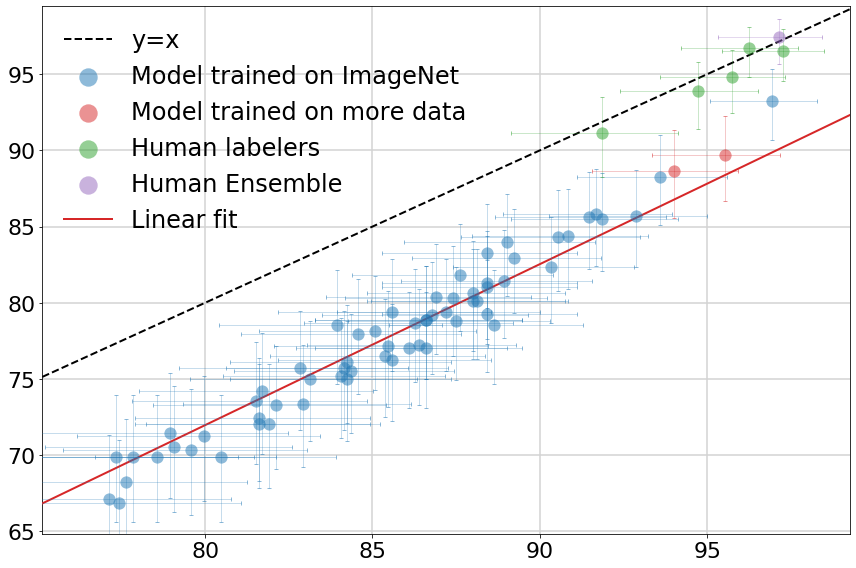

In [6]:
make_fig(h_a, df, "ImageNet vs ImageNetV2")

Include random chance:  False
ylim range / xlim range aspect ratio:  1.5007476051293316
ymax 92.58620689655173
Slope 1.0679217667433387, intercept -14.682956736943822, r 0.9861906512811747, pvalue 5.6575492054053086e-58, stderr 0.021135346593529905
human_a 97.07903780068729 96.72413793103448
human_b 98.28178694158075 97.75862068965517
human_c 99.14089347079039 99.82758620689656
human_d 98.79725085910653 98.44827586206897
human_e 98.79725085910653 97.06896551724138
FixResNeXt101_32x48d_v2 95.01718213058419 89.3103448275862
instagram-48d 93.98625429553265 88.10344827586208
efficientnet-b7 92.43986254295532 84.48275862068965
resnet50 82.4742268041237 72.75862068965517
Include random chance:  False
ylim range / xlim range aspect ratio:  1.3947682890977113
ymax 94.21965317919076
Slope 1.0609494166435591, intercept -12.39913065440453, r 0.9931114932963968, pvalue 8.517784846600178e-69, stderr 0.01475226691578649
human_a 94.22632794457274 93.41040462427745
human_b 96.88221709006929 95.9537572

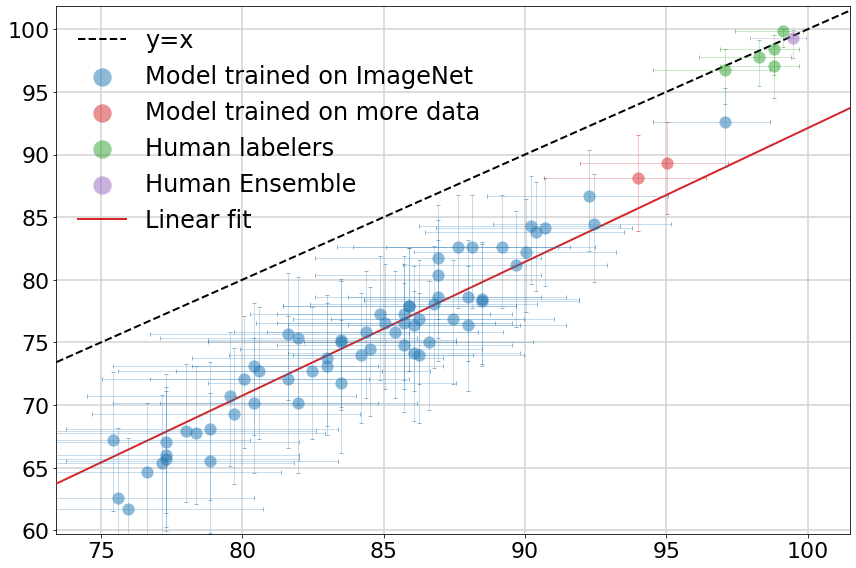

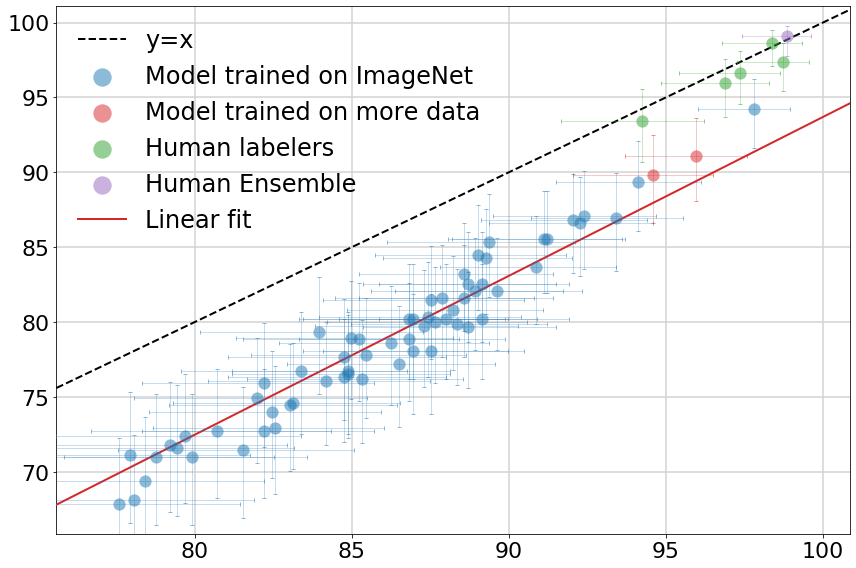

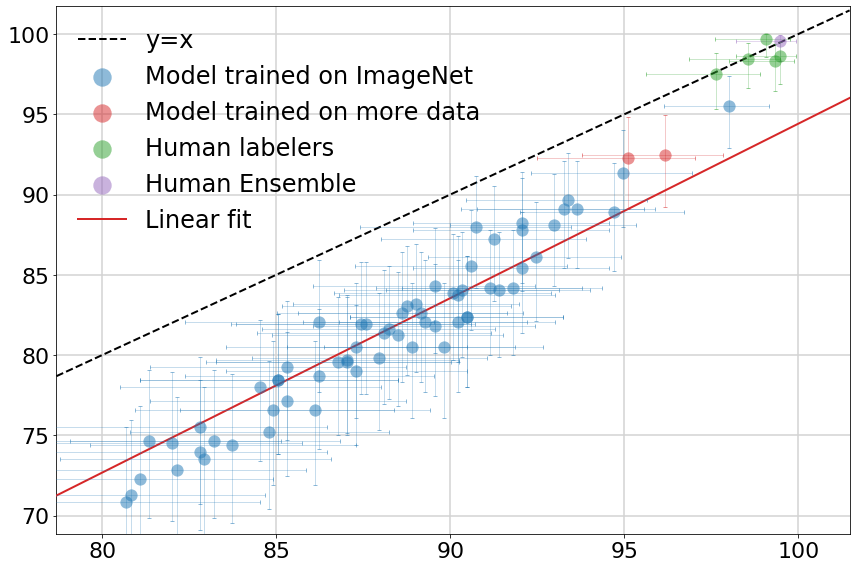

In [7]:
make_fig(h_a, df, "objects_only", h_a.OBJECT_FILTER)
make_fig(h_a, df, "no_dogs", h_a.NOTDOG_FILTER)
make_fig(h_a, df, "fast_images", h_a.FASTIMAGES_FILTER)

# View Initial 40k Annotations 

In [10]:
h_a.initial_annotations

{'00013b50faad3edb4cc55844e883dbe44352b2cd': {'correct': ['n02018795']},
 '000372dc99a70969a2ce07843b46b7315334817d': {'wrong': ['n02279972',
   'n02980441',
   'n04428191'],
  'correct': ['n03496892']},
 '0003b329c6c44d401beaf36c0170cde7dfbb1fc1': {'wrong': ['n03891251',
   'n04355933'],
  'correct': ['n04251144']},
 '0004d92768966d96ed2a197358f8926c41f0c5b6': {'correct': ['n13044778']},
 '00052e25908c707d53883a23cf203c00cb79bdb6': {'correct': ['n02727426']},
 '0007b7f4a11411364fcb59d09d2252c5ca9cb312': {'wrong': ['n01753488'],
  'correct': ['n01756291']},
 '000ad60be25ce06569f4309f62a4f13d0803920d': {'correct': ['n01514668'],
  'wrong': ['n01514859']},
 '000b02d6b8a3326129fd2138b438e473e6204d5a': {'wrong': ['n02802426',
   'n02992211',
   'n03110669',
   'n04296562',
   'n04597913'],
  'correct': ['n03720891']},
 '00134b97d97bc0bdcafacaec9892905f8c2b9e62': {'correct': ['n02483362']},
 '0015bec9c432e5d154132d618e2d10de488d0403': {'correct': ['n02325366'],
  'wrong': ['n02326432']},
 '

In [15]:
h_a.image_labels

{'ILSVRC2012_val_00002762.JPEG': defaultdict(set, {'correct': {'n02454379'}}),
 'ILSVRC2012_val_00013882.JPEG': defaultdict(set,
             {'correct': {'n04590129'}, 'wrong': {'n04589890'}}),
 'ILSVRC2012_val_00026153.JPEG': defaultdict(set, {'correct': {'n02097658'}}),
 'ILSVRC2012_val_00030110.JPEG': defaultdict(set, {'correct': {'n04254777'}}),
 'ILSVRC2012_val_00023738.JPEG': defaultdict(set,
             {'correct': {'n03291819', 'n03595614'}}),
 'ILSVRC2012_val_00029067.JPEG': defaultdict(set, {'correct': {'n03920288'}}),
 'ILSVRC2012_val_00041853.JPEG': defaultdict(set, {'correct': {'n04037443'}}),
 'ILSVRC2012_val_00048060.JPEG': defaultdict(set,
             {'wrong': {'n03781244'}, 'correct': {'n04355338'}}),
 'ILSVRC2012_val_00028156.JPEG': defaultdict(set,
             {'wrong': {'n03793489'}, 'correct': {'n03794056'}}),
 'ILSVRC2012_val_00038837.JPEG': defaultdict(set, {'correct': {'n04049303'}}),
 'ILSVRC2012_val_00006635.JPEG': defaultdict(set,
             {'correct'

In [22]:
img = '991fcfbf753cd482479b874aaa99da24e798ef43'
img_key, img_src = imageid_to_key(img)
img_url = s3_key_to_url(img_key)
wnid = h_a.wnid_map[img]
top_1_label = wnid_to_name(wnid)
initial_multi_labels = [wnid_to_name(x) for x in h_a.initial_annotations[img]["correct"]]
final_multi_labels = [wnid_to_name(x) for x in h_a.image_labels[img]["correct"]] # multi-labels from phase2
print(f"ImageNet Label: {top_1_label}, Initial_multi_labels: {initial_multi_labels}, Final_multi_labels: {final_multi_labels}")
imshow(imageio.imread(img_url))


ImageNet Label: weasel, Initial_multi_labels: ['weasel', 'polecat'], Final_multi_labels: ['weasel', 'polecat']


HTTPError: HTTP Error 403: Forbidden